In [4]:
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.1.0'

In [5]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 26s 0us/step


C:\Users\User\anaconda3\envs\cifar-gpu\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


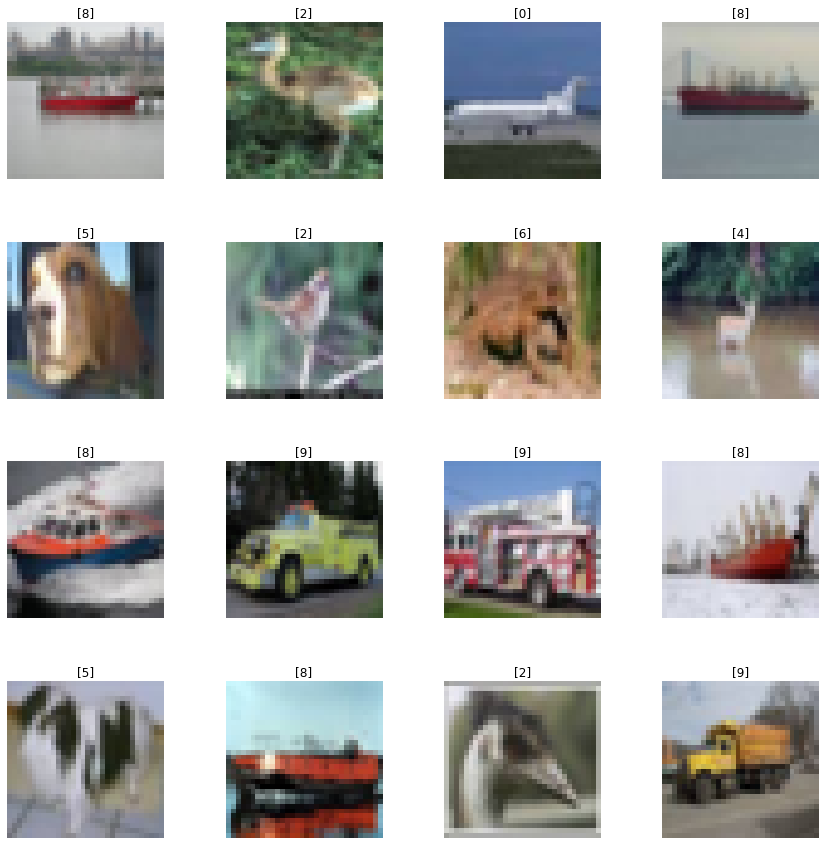

In [6]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4);

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
number_cat = 10

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

In [10]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [11]:
y_train.size

500000

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
input_shape = X_train.shape[1:]

In [14]:
y_train.shape

(50000, 10)

In [15]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [16]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), # 0.0000006
            loss ='categorical_crossentropy', metrics =['accuracy'])

In [17]:
epochs = 100
with tf.device('/GPU:0'):
    history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 18s 363us/sample - loss: 2.1067 - accuracy: 0.2210
Epoch 2/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.8514 - accuracy: 0.3320
Epoch 3/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.7470 - accuracy: 0.3676
Epoch 4/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.6710 - accuracy: 0.3956
Epoch 5/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.6213 - accuracy: 0.4148
Epoch 6/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.5676 - accuracy: 0.4352
Epoch 7/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.5281 - accuracy: 0.4495
Epoch 8/100
50000/50000 [==============================] - 4s 84us/sample - loss: 1.4861 - accuracy: 0.4653
Epoch 9/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.4493 - accuracy: 0.4758
Epo

Epoch 76/100
50000/50000 [==============================] - 4s 86us/sample - loss: 0.5830 - accuracy: 0.7953
Epoch 77/100
50000/50000 [==============================] - 4s 84us/sample - loss: 0.5766 - accuracy: 0.7970
Epoch 78/100
50000/50000 [==============================] - 4s 87us/sample - loss: 0.5742 - accuracy: 0.7978
Epoch 79/100
50000/50000 [==============================] - 4s 87us/sample - loss: 0.5703 - accuracy: 0.7988
Epoch 80/100
50000/50000 [==============================] - 4s 87us/sample - loss: 0.5607 - accuracy: 0.8031
Epoch 81/100
50000/50000 [==============================] - 4s 84us/sample - loss: 0.5503 - accuracy: 0.8057
Epoch 82/100
50000/50000 [==============================] - 4s 86us/sample - loss: 0.5480 - accuracy: 0.8068
Epoch 83/100
50000/50000 [==============================] - 4s 84us/sample - loss: 0.5389 - accuracy: 0.8104
Epoch 84/100
50000/50000 [==============================] - 4s 83us/sample - loss: 0.5326 - accuracy: 0.8122
Epoch 85/100
50000/

In [18]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 142us/sample - loss: 0.6776 - accuracy: 0.7690
Test Accuracy: 0.7689999938011169


In [19]:
predicted_classes = cnn.predict_classes(X_test) 
predicted_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [20]:
y_test = y_test.argmax(1)

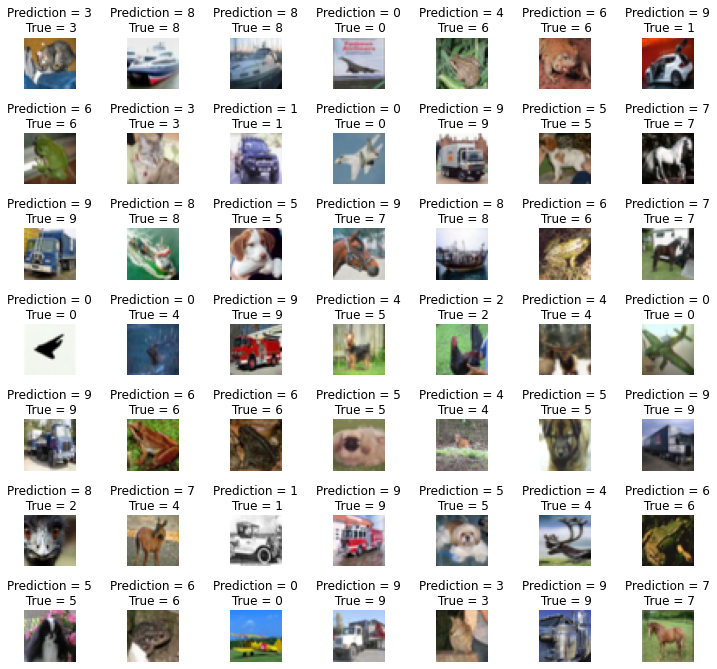

In [21]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

In [23]:
cnn.save('cifar10.h5')

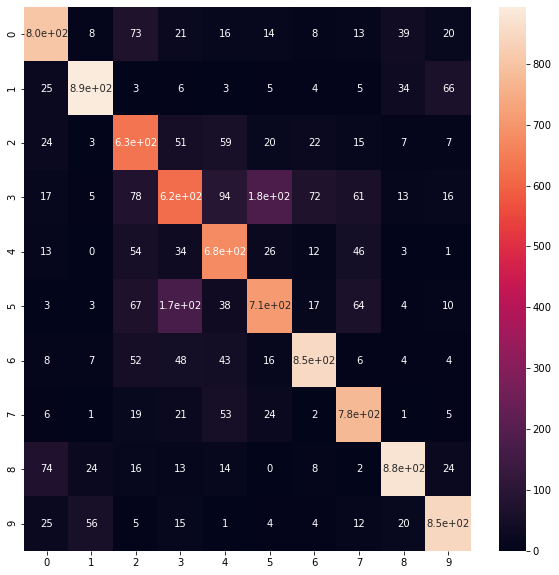

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [25]:
cm

array([[805,   8,  73,  21,  16,  14,   8,  13,  39,  20],
       [ 25, 893,   3,   6,   3,   5,   4,   5,  34,  66],
       [ 24,   3, 633,  51,  59,  20,  22,  15,   7,   7],
       [ 17,   5,  78, 620,  94, 180,  72,  61,  13,  16],
       [ 13,   0,  54,  34, 679,  26,  12,  46,   3,   1],
       [  3,   3,  67, 171,  38, 711,  17,  64,   4,  10],
       [  8,   7,  52,  48,  43,  16, 851,   6,   4,   4],
       [  6,   1,  19,  21,  53,  24,   2, 776,   1,   5],
       [ 74,  24,  16,  13,  14,   0,   8,   2, 875,  24],
       [ 25,  56,   5,  15,   1,   4,   4,  12,  20, 847]], dtype=int64)